In [6]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv', sep=',', decimal='.')

In [7]:
churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
fig = px.pie(
    data_frame=churn_data,
    names=churn_data['Exited'].map({1:'Лояльные', 0:'Ушедшие'}),
    title='Соотношение ушедших и лояльных клиентов',
)

fig.show()

In [9]:
pie_data = churn_data.groupby('Exited')['Exited'].count()


fig = px.pie(
    data_frame=pie_data,
    names=['Ушедшие', 'Лояльные'],
    values=pie_data,
    title='Соотношение ушедших и лояльных клиентов',
    
)

fig.show()
fig.write_html('files to share/pie.html')

C:\Users\qwert\AppData\Local\Temp\ipykernel_14504\2124004024.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Количество клиентов')

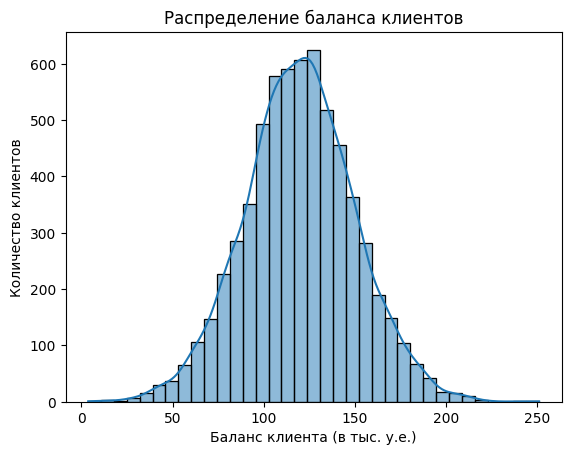

In [11]:
limited_balance = churn_data[churn_data['Balance'] >= 2500]
limited_balance['Balance'] = limited_balance['Balance'] / 1000

histogr = sns.histplot(
    limited_balance,
    x='Balance',
    bins=35,
    kde=True,
)

histogr.set_title('Распределение баланса клиентов')
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)')
histogr.set_ylabel('Количество клиентов')